In [3]:
import pandas as pd
import plotly.express as px
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
raw_df = pd.read_csv(r'/home/gabriel/Downloads/PS_20174392719_1491204439457_log.csv')
display("Raw dataset sample:")
display(raw_df.sample(5))

'Raw dataset sample:'

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3307271,252,PAYMENT,22650.29,C1489586426,643017.52,620367.23,M1266375934,0.00,0.00,0,0
4094596,301,CASH_IN,49878.56,C525201599,11762696.05,11812574.62,C191439178,2685247.22,2635368.65,0,0
2585140,207,CASH_OUT,81191.55,C791392321,0.00,0.00,C355748145,1106117.17,1187308.72,0,0
4294413,307,CASH_IN,172840.62,C1713887724,117673.00,290513.62,C1680241779,181682.28,8841.66,0,0
5071573,355,PAYMENT,11661.55,C1719066622,0.00,0.00,M1424678935,0.00,0.00,0,0


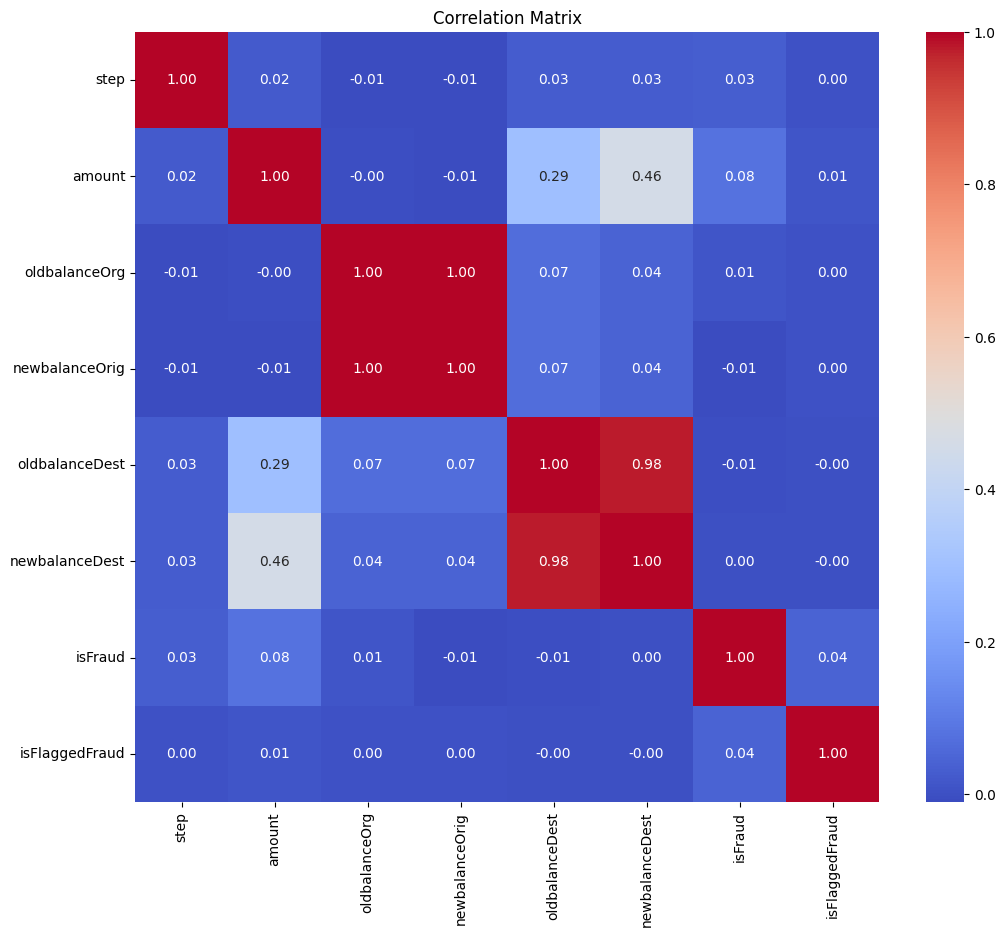

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

cor_df = raw_df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(cor_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [10]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
raw_df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
cat_features = raw_df[raw_df.columns[raw_df.dtypes == "object"]].columns
cat_features

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [15]:
num_features = raw_df[raw_df.columns[raw_df.dtypes != "object"]].columns
num_features

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')